In [51]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import os
import sys

In [52]:
for i in os.walk('./data'):
    d = {j:pd.read_csv('./data/'+j, index_col=0, parse_dates=[0]) for j in i[2]}
del d['.DS_Store']

In [53]:
OPEN = DataFrame()
HIGH = DataFrame()
LOW = DataFrame()
CLOSE = DataFrame()
PRE_CLOSE = DataFrame()
RoR = DataFrame()

In [54]:
for i in d.keys():
    OPEN.loc[:, i] = d[i].OPEN
    HIGH.loc[:, i] = d[i].HIGH
    LOW.loc[:, i] = d[i].LOW
    CLOSE.loc[:, i] = d[i].CLOSE
    PRE_CLOSE.loc[:, i] = d[i].CURRENT_MAIN_PRE_CLOSE
    RoR.loc[:, i] = d[i].CLOSE / d[i].CURRENT_MAIN_PRE_CLOSE - 1
    #df.loc[:, i] = d[i].CLOSE / d[i].OPEN - 1
OPEN.columns = [i[18:-4] for i in OPEN.columns]
HIGH.columns = [i[18:-4] for i in HIGH.columns]
LOW.columns = [i[18:-4] for i in LOW.columns]
CLOSE.columns = [i[18:-4] for i in CLOSE.columns]
PRE_CLOSE.columns = [i[18:-4] for i in PRE_CLOSE.columns]
RoR.columns = [i[18:-4] for i in RoR.columns]

-0.0006171488633215261
[1.425772]


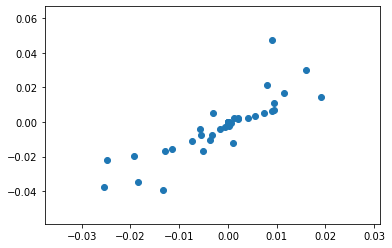

In [86]:
m = 6
n = 1
r = RoR.resample('M').sum()
c = CLOSE.resample('M').last()
ma = c.rolling(m).mean()
r_past = (c / ma - 1).fillna(0)
relative_r_past = r_past.subtract(r_past.median(1), 0)
tsmom = r_past
xmom = relative_r_past
r_future = r.shift(-n)
r_tsmom = np.sign(tsmom) * r_future
r_xmom = np.sign(xmom) * r_future
x = r_xmom.mean(1).dropna().values
y = r_tsmom.mean(1).dropna().values
model = linear_model.LinearRegression()
model.fit(x.reshape(-1,1), y)
print(model.intercept_)
print(model.coef_)
DataFrame({1:x,2:y}).to_csv('./a.csv')
plt.scatter(x,y)

0.0005228181539062714
[0.88160051]


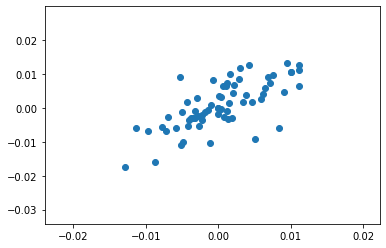

In [55]:
m = 52
n = 52
r = RoR.resample('W').sum()
r_past = r.rolling(m).sum()
relative_r_past = r_past.subtract(r_past.median(1), 0)
tsmom = r_past
xmom = relative_r_past
r_future = r.shift(-n)
r_tsmom = np.sign(tsmom) * r_future
r_xmom = np.sign(xmom) * r_future
x = r_xmom.mean(1).dropna().values
y = r_tsmom.mean(1).dropna().values
model = linear_model.LinearRegression()
model.fit(x.reshape(-1,1), y)
print(model.intercept_)
print(model.coef_)
DataFrame({1:x,2:y}).to_csv('./a.csv')
plt.scatter(x,y)

In [ ]:
m = 52
n = 52
o = OPEN.resample('W').last()
h = HIGH.resample('W').last()
l = LOW.resample('W').last()
c = CLOSE.resample('W').last()
ma = c.shift(1).rolling(m).mean()
buy_signal = h > ma
sell_signal = l < ma
position = DataFrame(index=o.index, columns=o.columns)
position.iloc[0, :] = 0
pnl = DataFrame(index=o.index, columns=o.columns)
pnl.iloc[0, :] = 0
for i in range(1, len(positon)):
    position.iloc[:, position.iloc[:, i-1]==0] = buy_signal.iloc[:, position.iloc[:, i-1]==0] * 1
    position.iloc[:, position.iloc[:, i-1]==1] = sell_signal.iloc[:, position.iloc[:, i-1]==1] * (-1)
    position.iloc[:, position.iloc[:, i-1]==-1] = buy_signal.iloc[:, position.iloc[:, i-1]==-1] * 1
    pnl.iloc[:, position.iloc[:, i-1]==0] = c.iloc[:, position.iloc[:, i-1]==0] / ma.iloc[:, position.iloc[:, i-1]==0] - 1
    pnl.iloc[:, position.iloc[:, i-1]==1] = c.iloc[:, position.iloc[:, i-1]==1] / c.shift(1).iloc[:, position.iloc[:, i-1]==1]
    pnl.iloc[:, position.iloc[:, i-1]==-1] = buy_signal * 1

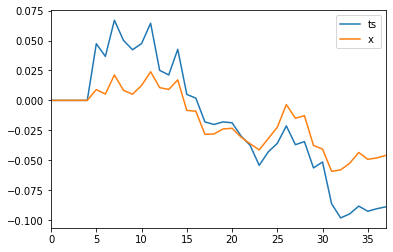

In [87]:
#del d['MX_BaseData_Daily_IH.CFE.csv']
DataFrame({'ts':Series(y).cumsum(), 'x':Series(x).cumsum()}).plot()

0.0001898963521830541
[1.72785633]


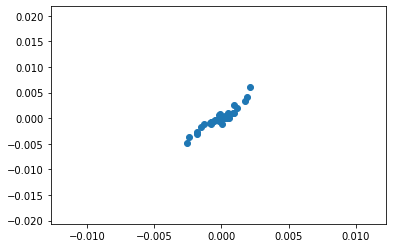

In [137]:
r = df.resample('M').sum()
r_past = r.rolling(1).sum()
r_r_past = r_past.subtract(r_past.median(1), 0)
tsmom = r_past
xmom = r_r_past
r_future = r.shift(-1)
r_tsmom = tsmom * r_future
r_xmom = xmom * r_future
x = r_xmom.mean(1).dropna().values
y = r_tsmom.mean(1).dropna().values
model = linear_model.LinearRegression()
model.fit(x.reshape(-1,1), y)
print(model.intercept_)
print(model.coef_)
DataFrame({1:x,2:y}).to_csv('./a.csv')
plt.scatter(x,y)

In [131]:
r_geye = r_tsmom.mean(1).cumsum()

In [126]:
r_rinei = r_tsmom.mean(1).cumsum()

In [121]:
r_geye

DateTime
2016-05-31   -0.004908
2016-06-30   -0.004921
2016-07-31   -0.004014
2016-08-31   -0.003721
2016-09-30   -0.000380
2016-10-31    0.005720
2016-11-30    0.003035
2016-12-31    0.001944
2017-01-31    0.001401
2017-02-28    0.002499
2017-03-31    0.003366
2017-04-30    0.005345
2017-05-31    0.001621
2017-06-30    0.005741
2017-07-31    0.008373
2017-08-31    0.005200
2017-09-30    0.005919
2017-10-31    0.004181
2017-11-30    0.003452
2017-12-31    0.003354
2018-01-31    0.002915
2018-02-28    0.001863
2018-03-31    0.000714
2018-04-30    0.001130
2018-05-31    0.000658
2018-06-30    0.000692
2018-07-31    0.001322
2018-08-31    0.000449
2018-09-30    0.000237
2018-10-31    0.000818
2018-11-30    0.000527
2018-12-31    0.000576
2019-01-31    0.001574
2019-02-28    0.002071
2019-03-31    0.002173
2019-04-30    0.001954
2019-05-31    0.001196
2019-06-30    0.001270
2019-07-31         NaN
Freq: M, dtype: float64

In [132]:
DataFrame({1:r_rinei,2:r_geye}).to_csv('./b.csv')

In [563]:
r_past = r.rolling(4).sum().fillna(0)
r_r_past = r_past.subtract(r_past.median(1), 0)

In [564]:
tsmom = np.sign(r_past)
xmom = np.sign(r_r_past)

In [565]:
r_future = r.shift(-1).fillna(0)

In [566]:
r_tsmom = tsmom * r_future
r_xmom = xmom * r_future

In [567]:
x = r_xmom.mean(1).values
y = r_tsmom.mean(1).values

In [568]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [569]:
model.intercept_

0.0005883043485844371

In [570]:
model.coef_

array([1.24849028])

In [571]:
DataFrame({1:x,2:y}).to_csv('./a.csv')

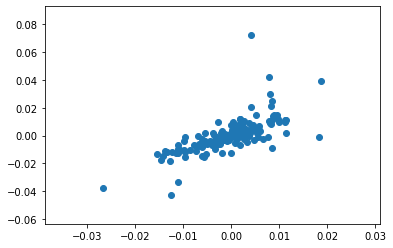

In [572]:
plt.scatter(x,y)

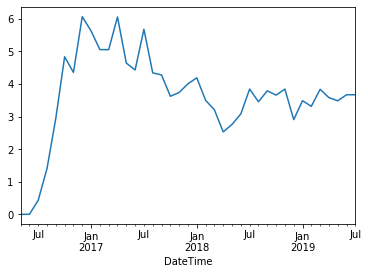

In [501]:
r_tsmom.cumsum().sum(1).plot()

In [11]:
list(d.keys())

['MX_BaseData_Daily_AL.SHF.csv',
 'MX_BaseData_Daily_HC.SHF.csv',
 'MX_BaseData_Daily_SN.SHF.csv',
 'MX_BaseData_Daily_IH.CFE.csv',
 'MX_BaseData_Daily_TA.CZC.csv',
 'MX_BaseData_Daily_CF.CZC.csv',
 'MX_BaseData_Daily_NI.SHF.csv',
 'MX_BaseData_Daily_M.DCE.csv',
 'MX_BaseData_Daily_CU.SHF.csv',
 'MX_BaseData_Daily_BU.SHF.csv',
 'MX_BaseData_Daily_IC.CFE.csv',
 'MX_BaseData_Daily_Y.DCE.csv',
 'MX_BaseData_Daily_L.DCE.csv',
 'MX_BaseData_Daily_CS.DCE.csv',
 'MX_BaseData_Daily_AG.SHF.csv',
 'MX_BaseData_Daily_PB.SHF.csv',
 'MX_BaseData_Daily_P.DCE.csv',
 'MX_BaseData_Daily_MA.CZC.csv',
 'MX_BaseData_Daily_PP.DCE.csv',
 'MX_BaseData_Daily_WH.CZC.csv',
 'MX_BaseData_Daily_ZC.CZC.csv',
 'MX_BaseData_Daily_ZN.SHF.csv',
 'MX_BaseData_Daily_I.DCE.csv',
 'MX_BaseData_Daily_JD.DCE.csv',
 'MX_BaseData_Daily_RM.CZC.csv',
 'MX_BaseData_Daily_RU.SHF.csv',
 'MX_BaseData_Daily_IF.CFE.csv',
 'MX_BaseData_Daily_JM.DCE.csv',
 'MX_BaseData_Daily_A.DCE.csv',
 'MX_BaseData_Daily_RB.SHF.csv',
 'MX_BaseData_Da

In [13]:
d

{'MX_BaseData_Daily_AL.SHF.csv':             PRE_CLOSE     OPEN    CLOSE     HIGH      LOW    VOLUME  \
 DateTime                                                              
 2016-05-04    12755.0  12715.0  12475.0  12740.0  12455.0  207928.0   
 2016-05-05    12475.0  12505.0  12455.0  12570.0  12400.0  161326.0   
 2016-05-06    12455.0  12490.0  12340.0  12535.0  12200.0  274898.0   
 2016-05-09    12340.0  12315.0  12055.0  12490.0  11980.0  254028.0   
 2016-05-10    12055.0  12080.0  11910.0  12080.0  11770.0  240472.0   
 ...               ...      ...      ...      ...      ...       ...   
 2019-07-23    13860.0  13840.0  13750.0  13865.0  13750.0  145014.0   
 2019-07-24    13750.0  13765.0  13790.0  13805.0  13735.0  110282.0   
 2019-07-25    13790.0  13790.0  13890.0  13895.0  13790.0  124626.0   
 2019-07-26    13890.0  13890.0  13875.0  13950.0  13870.0  121070.0   
 2019-07-29    13875.0  13865.0  13880.0  13900.0  13845.0   96046.0   
 
                      AMT     